# Multiple linear regression – fitting a model in sklearn

## Introduction

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#Explore the shape of the dataset
df.shape

(32, 11)

## Modelling miles per gallon

<IPython.core.display.Javascript object>


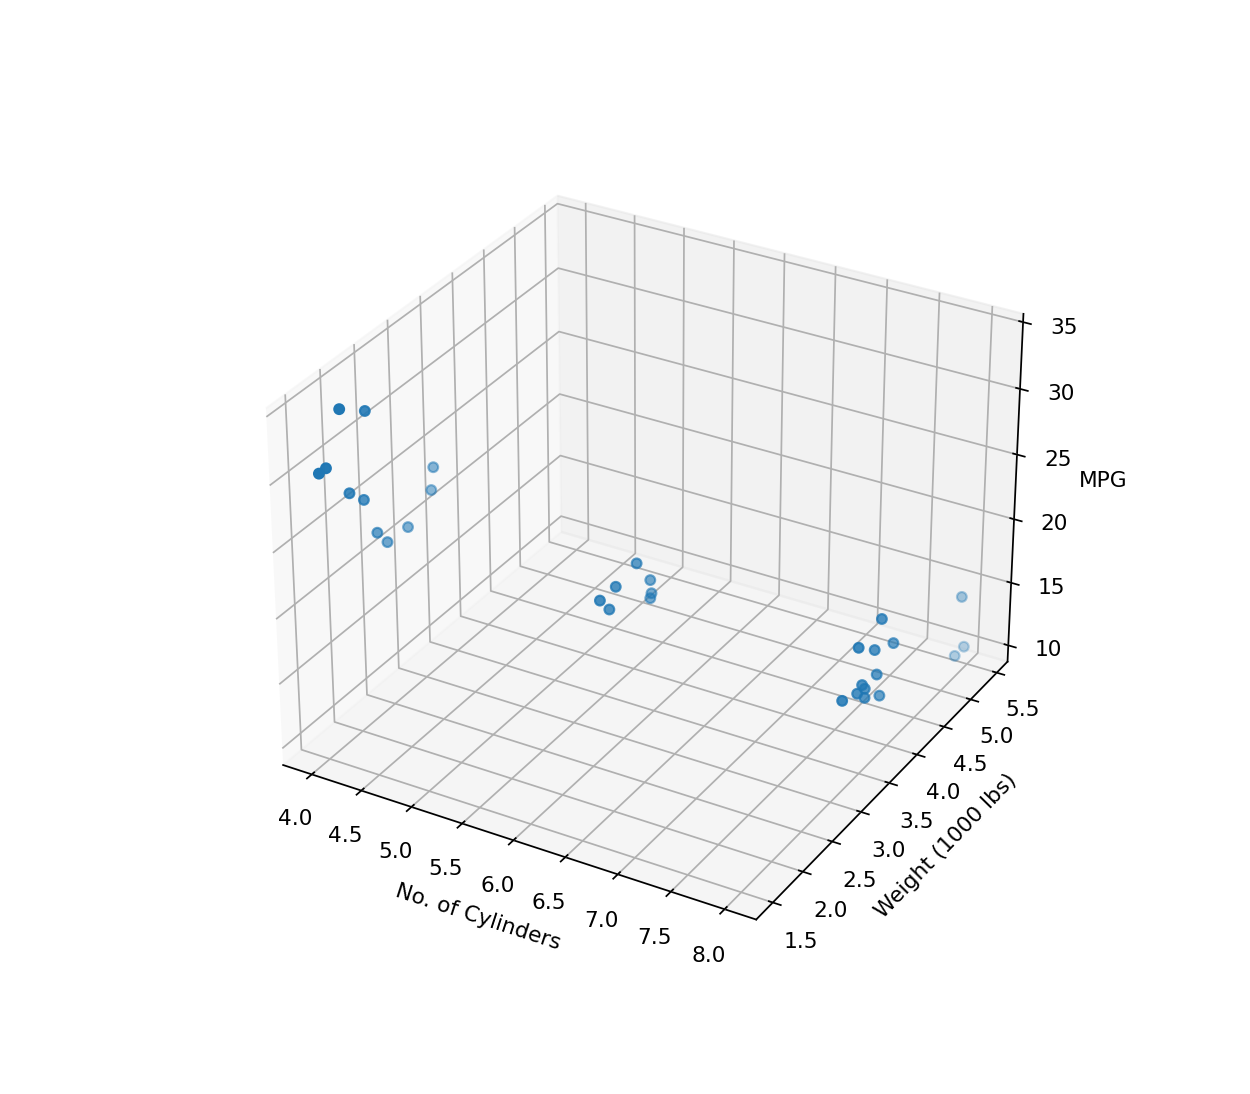

In [6]:
# create figure and 3D axes
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# set axis labels
ax.set_zlabel('MPG')
ax.set_xlabel('No. of Cylinders')
ax.set_ylabel('Weight (1000 lbs)')

# scatter plot with response variable and 2 predictors
ax.scatter(df['cyl'], df['wt'], df['mpg'])

## Fitting a multivariate regression model

In [7]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [8]:
# create model object
lm = LinearRegression()

In [9]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [10]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [11]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [13]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [14]:
print("Intercept:", beta_0)

Intercept: 8.465282572242597


In [15]:
beta_js

,Coefficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


<IPython.core.display.Javascript object>


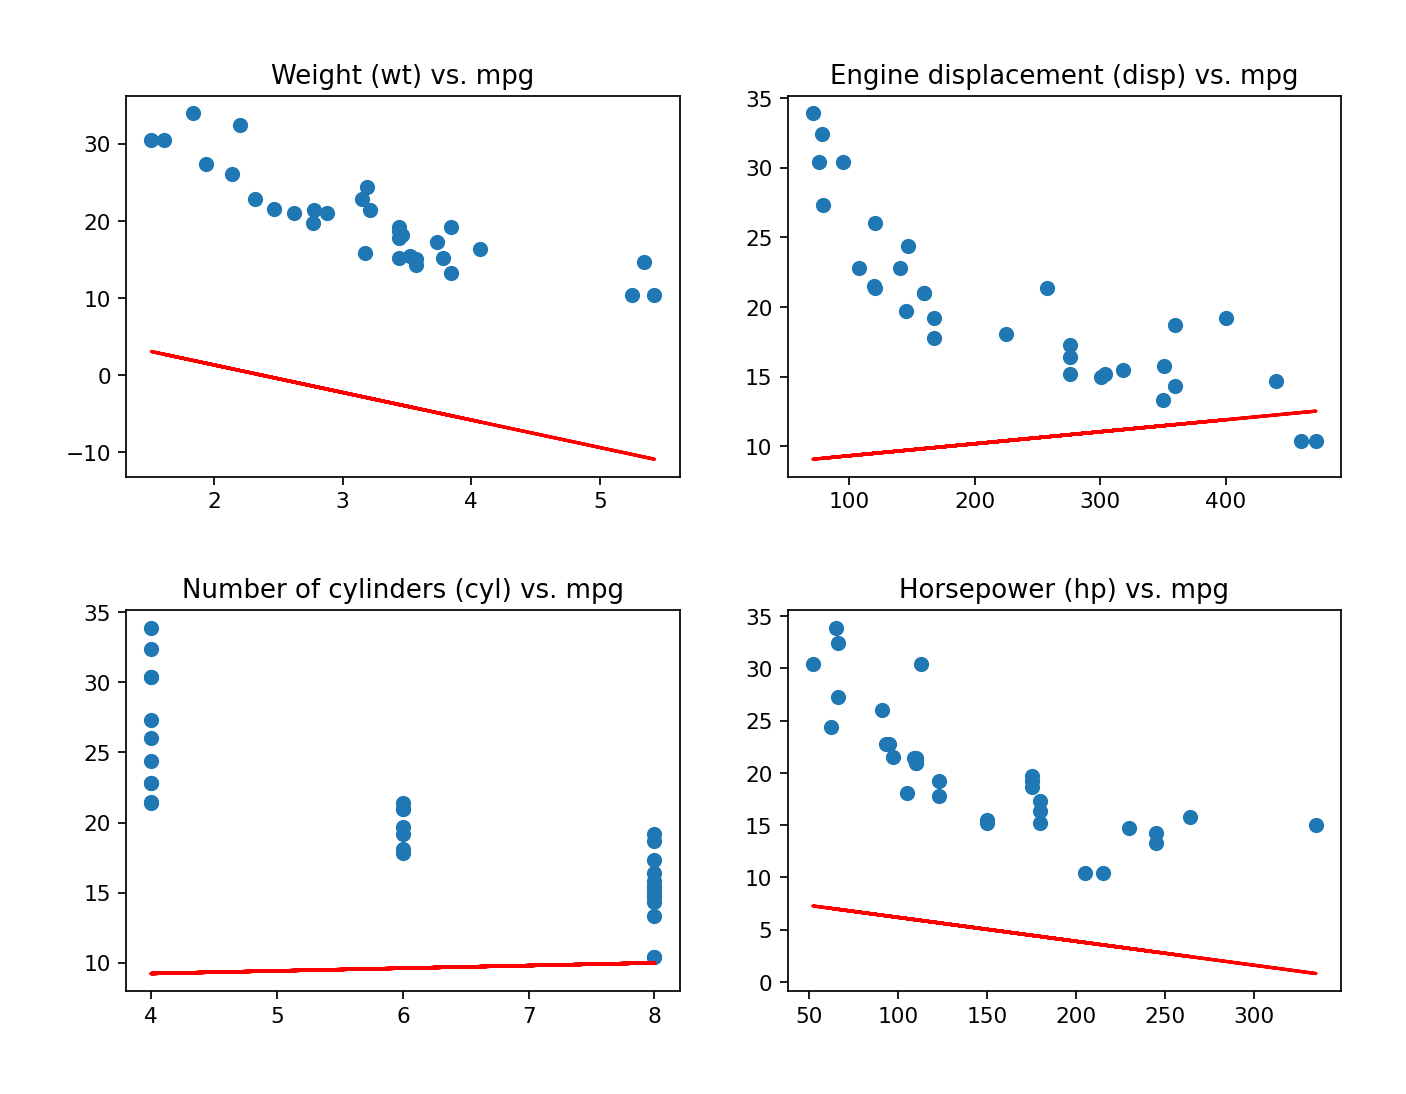

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['wt'], df['mpg'])
axs[0,0].plot(df['wt'], lm.intercept_ + lm.coef_[4]*df['wt'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. mpg')

axs[0,1].scatter(df['disp'], df['mpg'])
axs[0,1].plot(df['disp'], lm.intercept_ + lm.coef_[1]*df['disp'], color='red')
axs[0,1].title.set_text('Engine displacement (disp) vs. mpg')

axs[1,0].scatter(df['cyl'], df['mpg'])
axs[1,0].plot(df['cyl'], lm.intercept_ + lm.coef_[0]*df['cyl'], color='red')
axs[1,0].title.set_text('Number of cylinders (cyl) vs. mpg')

axs[1,1].scatter(df['hp'], df['mpg'])
axs[1,1].plot(df['hp'], lm.intercept_ + lm.coef_[2]*df['hp'], color='red')
axs[1,1].title.set_text('Horsepower (hp) vs. mpg')

fig.tight_layout(pad=3.0)

plt.show()

## Assessing model accuracy

In [17]:
# comparison linear model
slr = LinearRegression()

slr.fit(X_train[['disp']], y_train)

LinearRegression()

In [21]:
from sklearn import metrics
import math

In [22]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [23]:
# create DataFrame from dictionary
results_df = pd.DataFrame(data=results_dict)

In [24]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,8.201521,20.500165,4.527711
MLR,3.737534,11.520901,3.394245
